In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df=pd.read_csv('/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv')

In [13]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [15]:
df.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [16]:
df.shape

(30641, 9)

In [17]:
df = df.drop(columns=['Unnamed: 0'])
df = df.head(15000) 

In [18]:
df = pd.get_dummies(df, columns=['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep'], drop_first=True)

In [19]:
X = df.drop(columns=['MathScore'])
y = df['MathScore']

In [20]:
def train_evaluate(X, y, test_size, data_fraction):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Use only a fraction of the training data
    sample_size = int(len(X_train) * data_fraction)
    X_train_sampled = X_train[:sample_size]
    y_train_sampled = y_train[:sample_size]
    
    model = LinearRegression()
    model.fit(X_train_sampled, y_train_sampled)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    return model, rmse, r2, X_test, y_test, y_pred


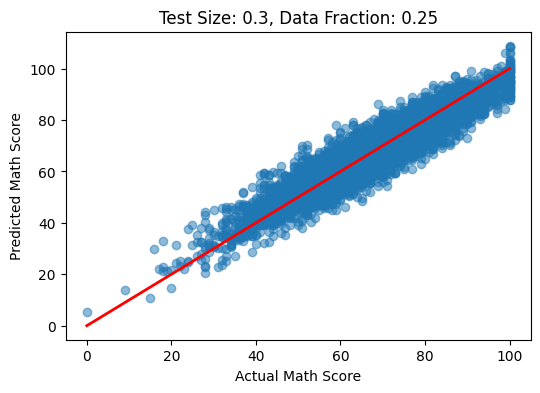

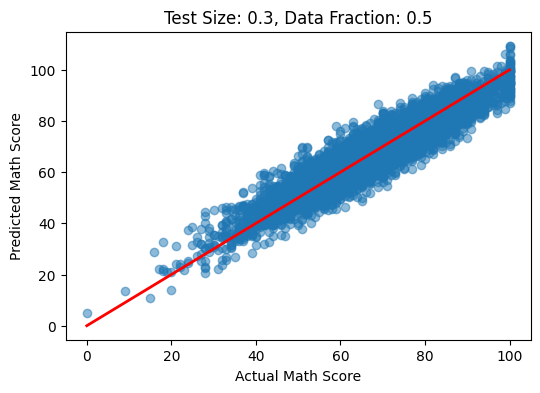

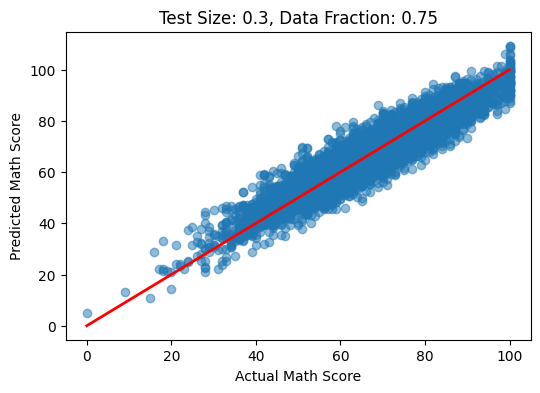

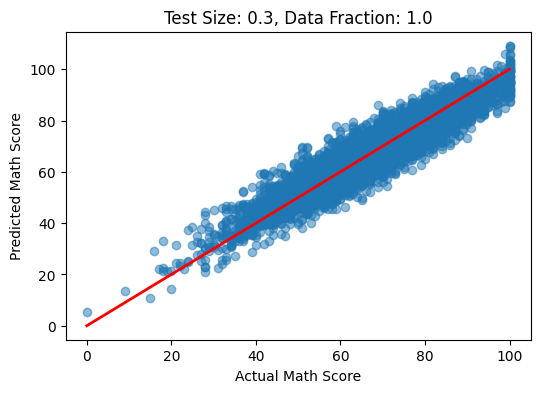

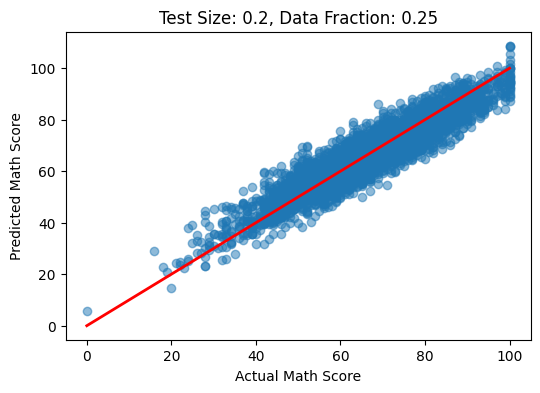

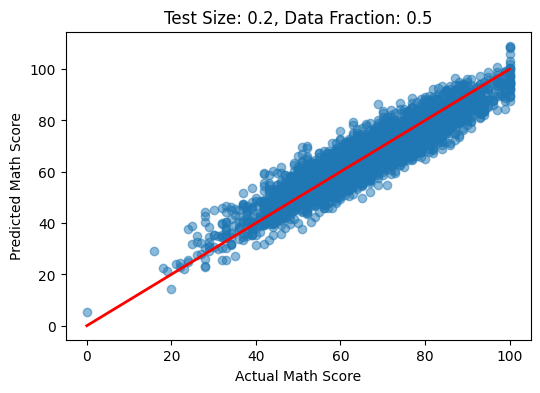

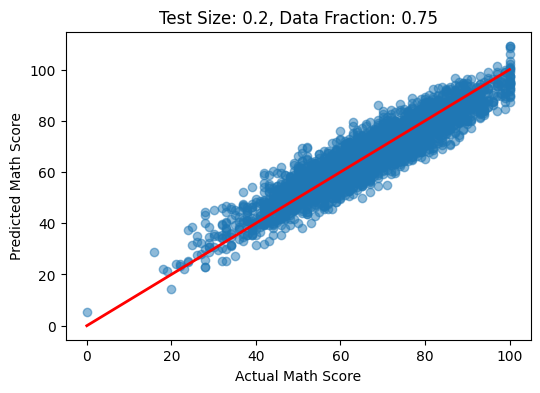

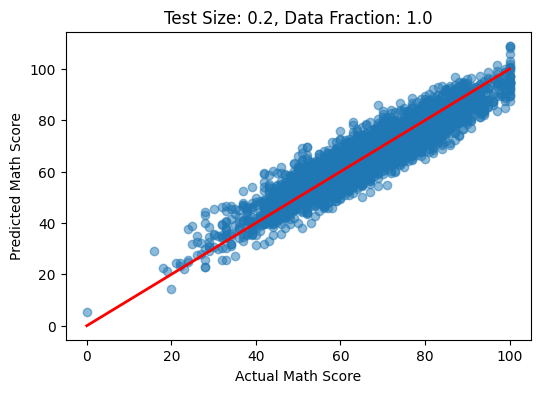

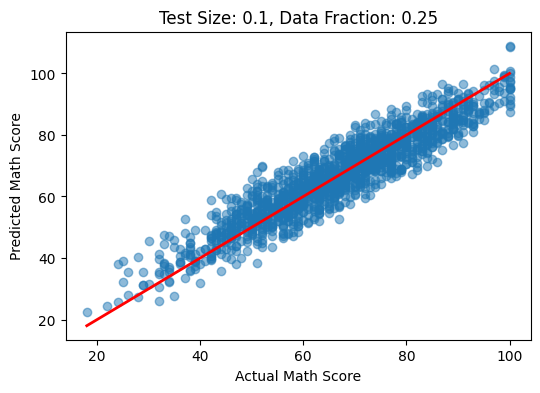

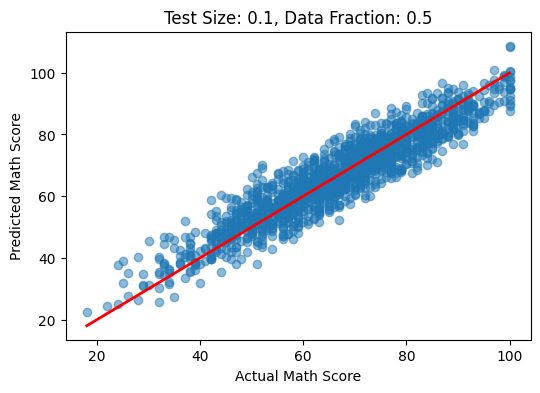

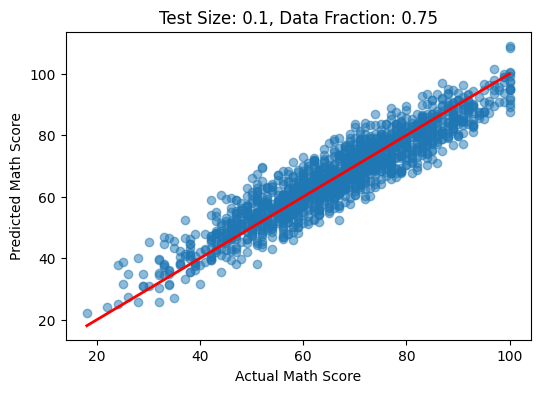

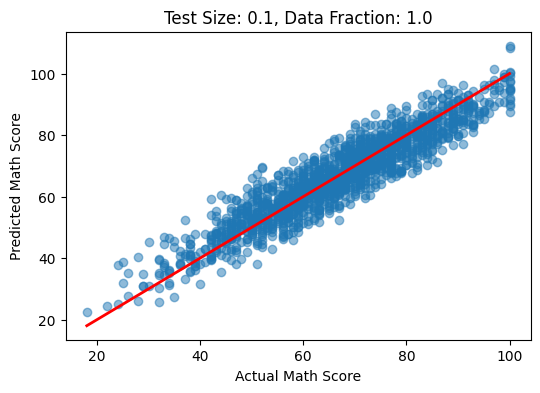

In [23]:
# Different configurations
splits = [0.3, 0.2, 0.1]
data_fractions = [0.25, 0.5, 0.75, 1.0]

results = []

for test_size in splits:
    for fraction in data_fractions:
        model, rmse, r2, X_test, y_test, y_pred = train_evaluate(X, y, test_size, fraction)
        results.append((test_size, fraction, rmse, r2))
        
        # Plot regression results
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
        plt.xlabel("Actual Math Score")
        plt.ylabel("Predicted Math Score")
        plt.title(f"Test Size: {test_size}, Data Fraction: {fraction}")
        plt.show()

In [24]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Test Size', 'Data Fraction', 'RMSE', 'R2'])
print(results_df)


    Test Size  Data Fraction      RMSE        R2
0         0.3           0.25  5.541857  0.867581
1         0.3           0.50  5.523048  0.868478
2         0.3           0.75  5.519358  0.868654
3         0.3           1.00  5.518469  0.868696
4         0.2           0.25  5.546962  0.866953
5         0.2           0.50  5.545914  0.867003
6         0.2           0.75  5.540009  0.867286
7         0.2           1.00  5.539078  0.867331
8         0.1           0.25  5.554960  0.864533
9         0.1           0.50  5.541635  0.865182
10        0.1           0.75  5.537195  0.865398
11        0.1           1.00  5.535007  0.865504
